## Importing the Libraries

In [9]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# setting the style of matplotlib
plt.style.use("fivethirtyeight")

# code to ignore warnings
import warnings 
warnings.filterwarnings("ignore")



## Importing the Data

## Dataset Link - https://bit.ly/2TK5Xn5

In [10]:
# Importing the data
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='cp1252')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Checking the Data types of features

In [11]:
df.dtypes


eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [12]:
df.count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [13]:
df.shape

(181691, 135)

## Checking if the values is null or not

In [14]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [15]:
# Selecting the most useful features in the dataset and discarding others which are not useful

df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]



In [16]:
df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


# EDA

### Number of Terrorist attacks in each and every year

In [17]:
df['Year'].value_counts(dropna = False).sort_index()


1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

### Some Basic Stats

In [18]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)


Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


### Number of Terrorist attacks each year

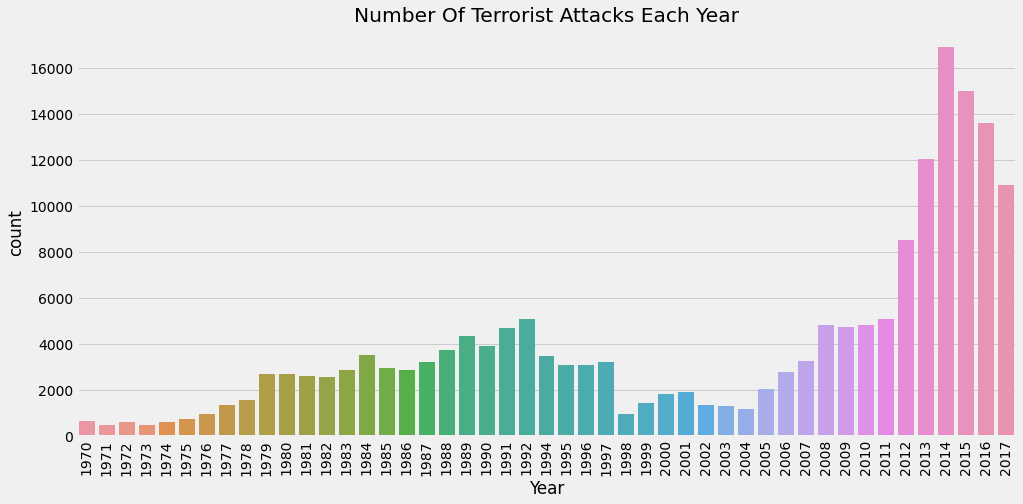

In [19]:
# Number of Terrorist attacks each year
plt.figure(figsize=(15,7))
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

### Number of Casualities each year


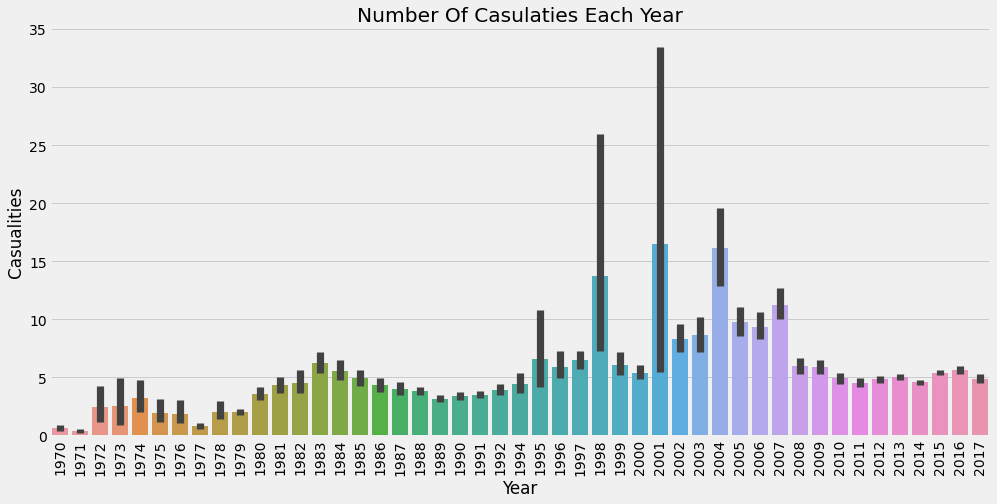

In [20]:
# Number of Casualities each year
plt.figure(figsize=(15,7))
sns.barplot(df['Year'], df['Casualities'])
plt.xticks(rotation=90)
plt.title('Number Of Casulaties Each Year')

plt.show()

### Number of casualities in each country


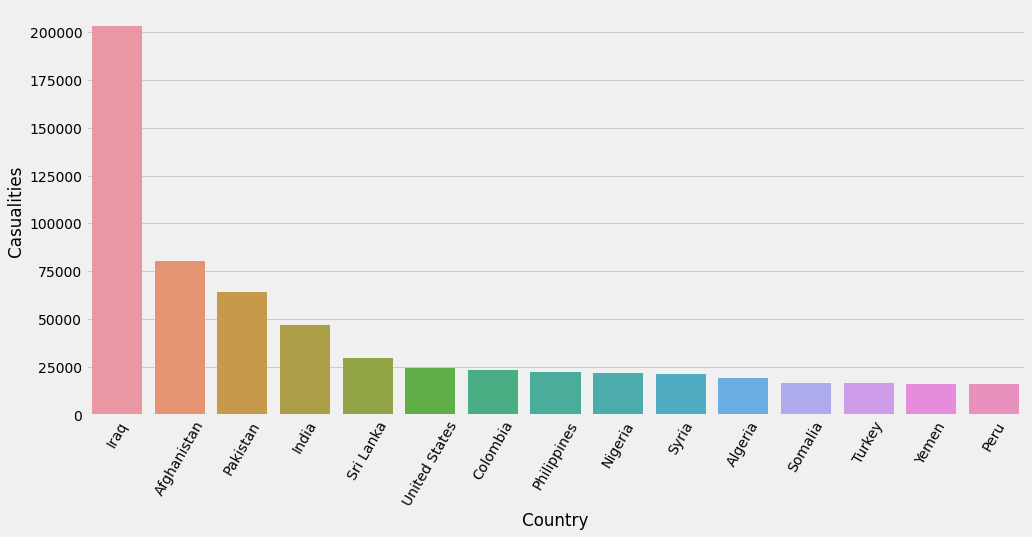

In [21]:
# Number of casualities in each country
plt.figure(figsize=(15,7))
country_df = df.groupby(['Country']).Casualities.sum().to_frame().reset_index().sort_values('Casualities',ascending=False)[:15]
sns.barplot(country_df['Country'], country_df['Casualities'])
plt.xticks(rotation=60)
plt.show()

### Number of casualities in each region


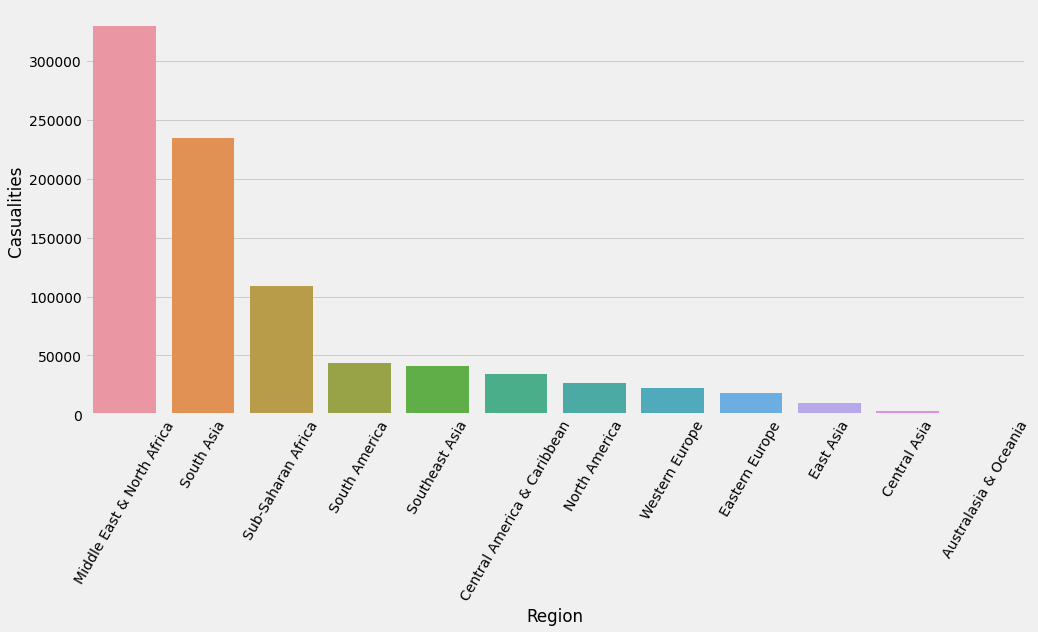

In [22]:
# Number of casualities in each region
plt.figure(figsize=(15,7))
region_df = df.groupby(['Region']).Casualities.sum().to_frame().reset_index().sort_values('Casualities',ascending=False)[:15]
sns.barplot(region_df['Region'], region_df['Casualities'])
plt.xticks(rotation=60)
plt.show()

### Number of casualities in each city


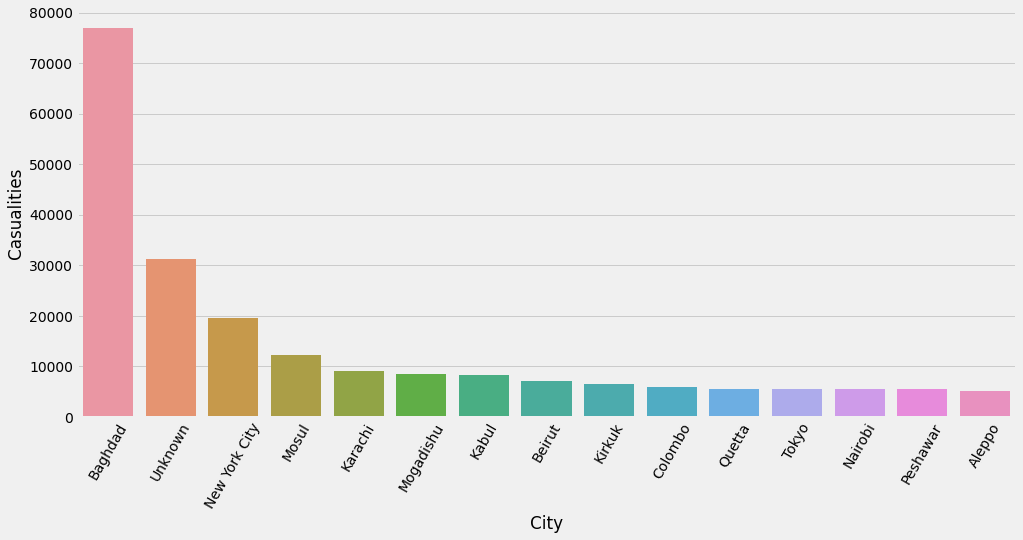

In [23]:
# Number of casualitiesin each city
plt.figure(figsize=(15,7))
city_df = df.groupby(['City']).Casualities.sum().to_frame().reset_index().sort_values('Casualities',ascending=False)[:15]
sns.barplot(city_df['City'], city_df['Casualities'])
plt.xticks(rotation=60)
plt.show()

### Number of attacks and killed in each country simultaneously


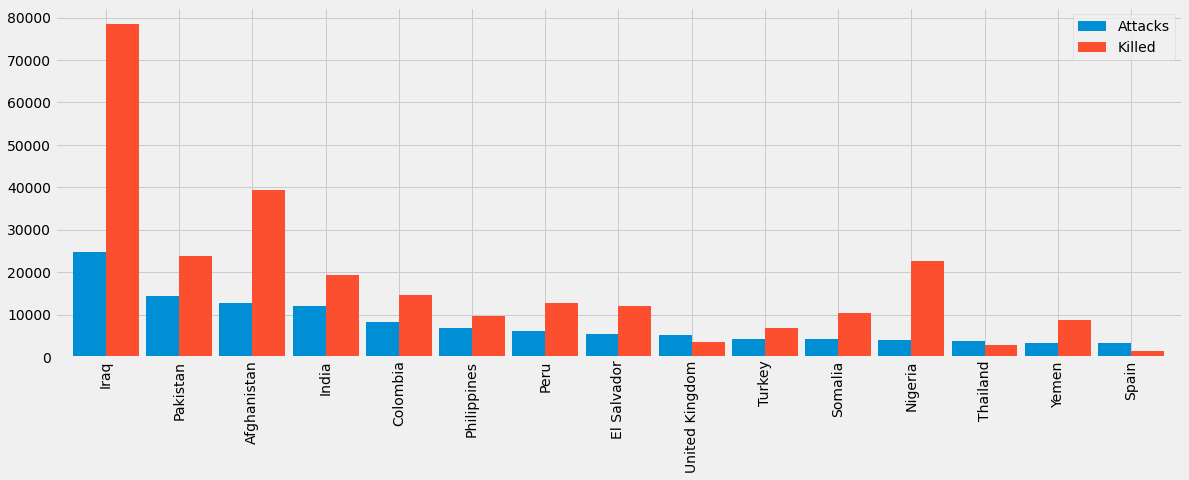

In [24]:
# Number of attacks and killed in each country simultaneously
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Which group caused the most casualities


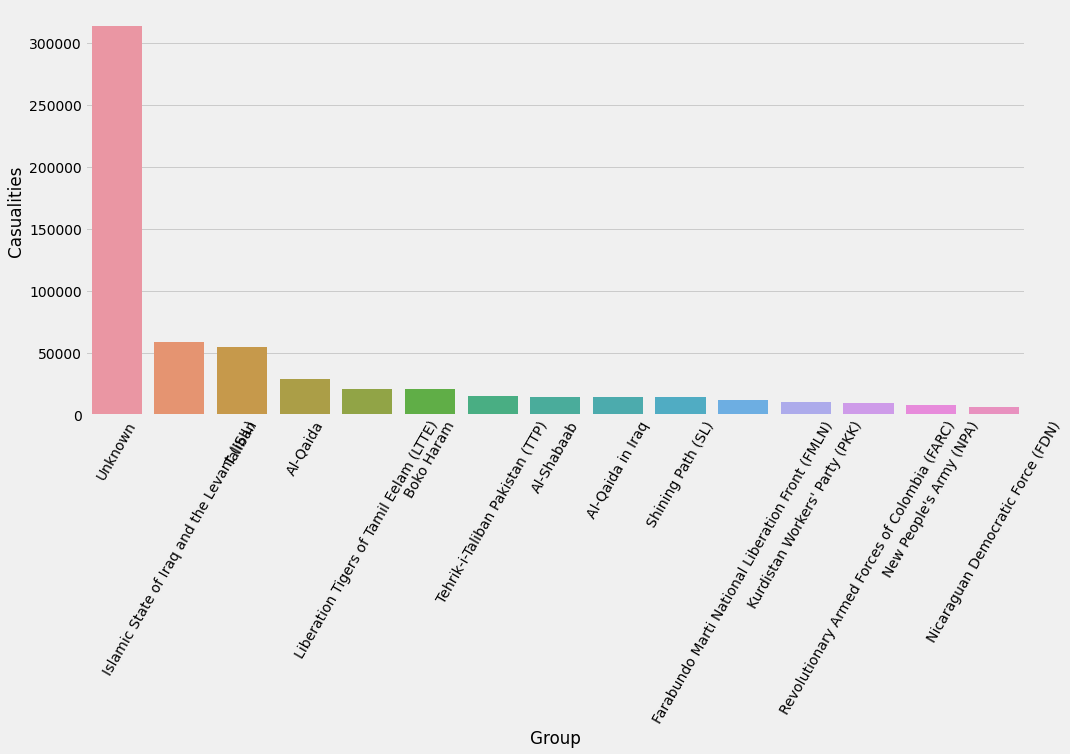

In [25]:
# Which group caused the most casualities
plt.figure(figsize=(15,7))
tg_df = df.groupby(['Group']).Casualities.sum().to_frame().reset_index().sort_values('Casualities',ascending=False)[:15]
sns.barplot(tg_df['Group'], tg_df['Casualities'])
plt.xticks(rotation=60)
plt.show()

### Terrorist group target's and target casualities


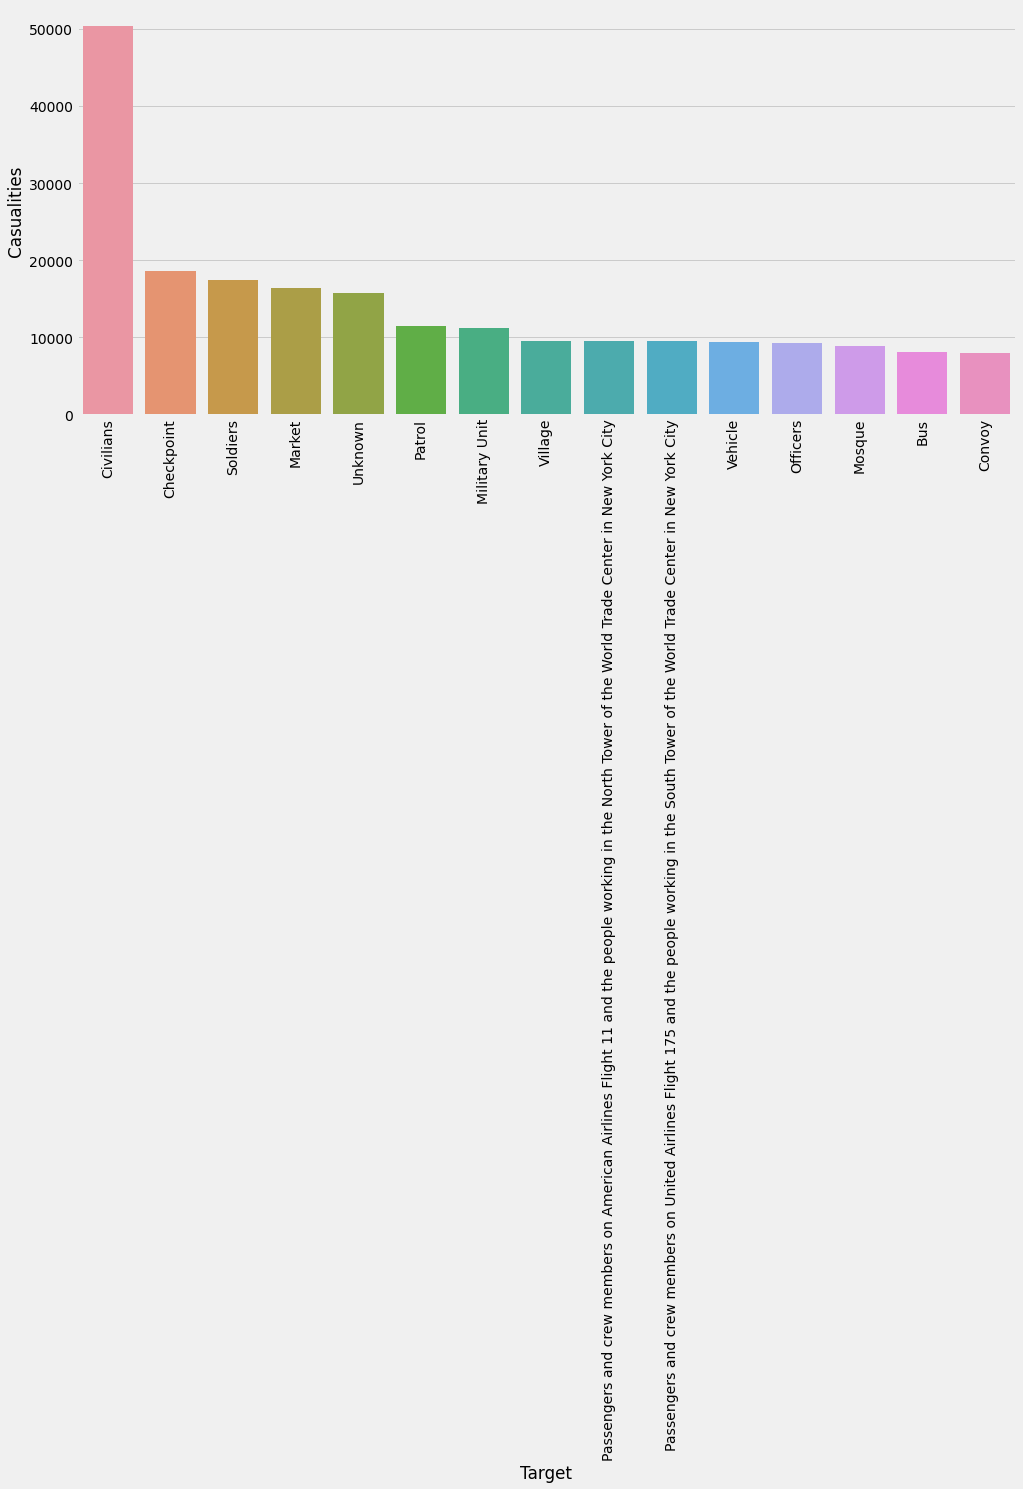

In [26]:
# Terrorist group target's and target casualities
plt.figure(figsize=(15,7))
target_df = df.groupby(['Target']).Casualities.sum().to_frame().reset_index().sort_values('Casualities',ascending=False)[:15]
sns.barplot(target_df['Target'], target_df['Casualities'])
plt.xticks(rotation=90)
plt.show()

### Number of attacks in each months


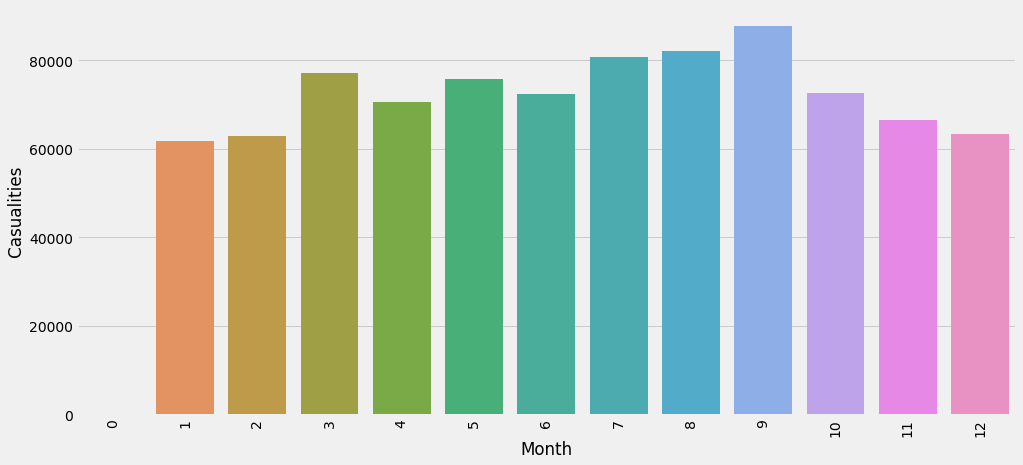

In [27]:
# Number of attack month-wise
plt.figure(figsize=(15,7))
month_df = df.groupby(['Month']).Casualities.sum().to_frame().reset_index().sort_values('Casualities',ascending=False)[:15]
sns.barplot(month_df['Month'], month_df['Casualities'])
plt.xticks(rotation=90)

plt.show()

### Terrorist attack locations in each year

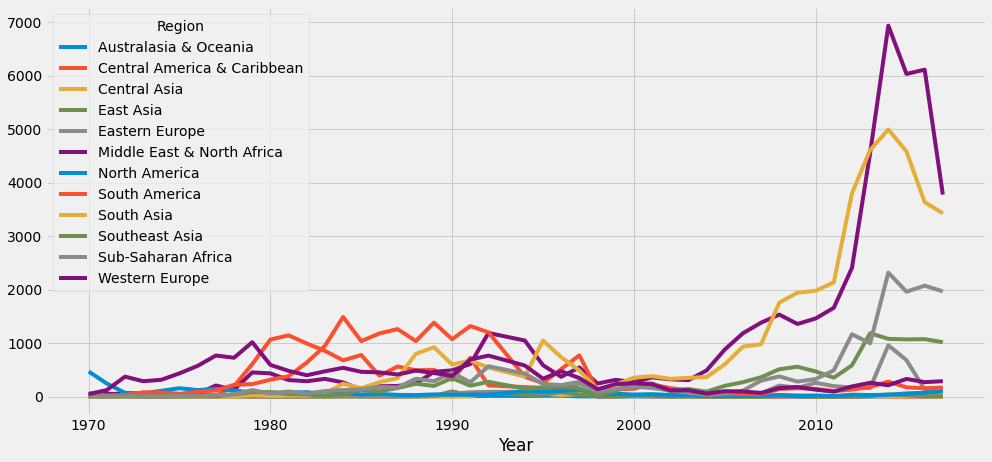

In [28]:
# Which region saw the most terrorist attacks in every year
terror_region = pd.crosstab(df.Year, df.Region)
terror_region.plot(figsize=(15,7))
plt.show()


### Which regions saw which attack types used by terrorist


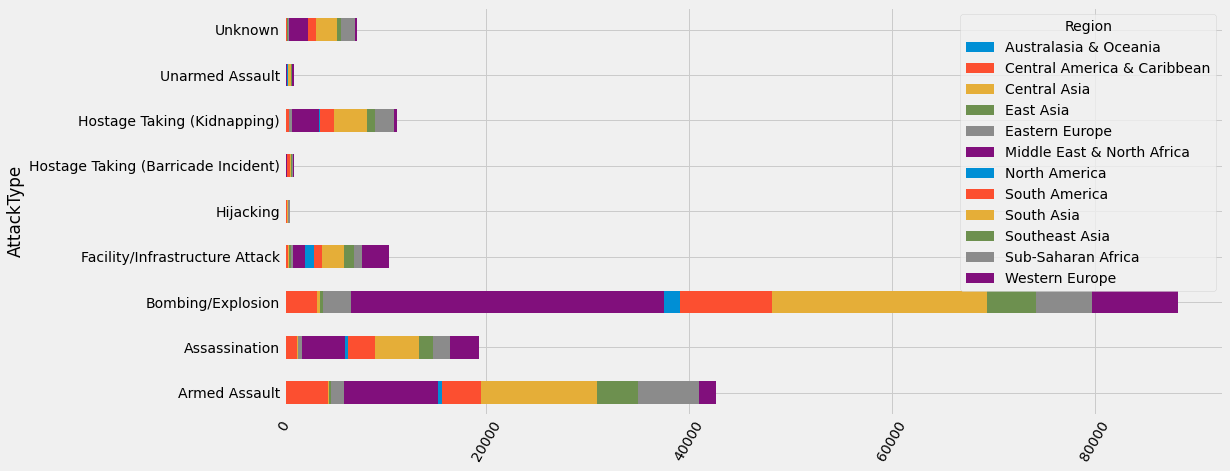

In [29]:
# Which regions saw which attack types used by terrorist
attactype_region = pd.crosstab(df.AttackType, df.Region)
attactype_region.plot.barh(stacked=True,figsize=(15,7))
plt.xticks(rotation=60)
plt.show()


###  Terrorist group with highest attacks


Text(0.5, 1.0, 'Terrorist group with highest attacks')

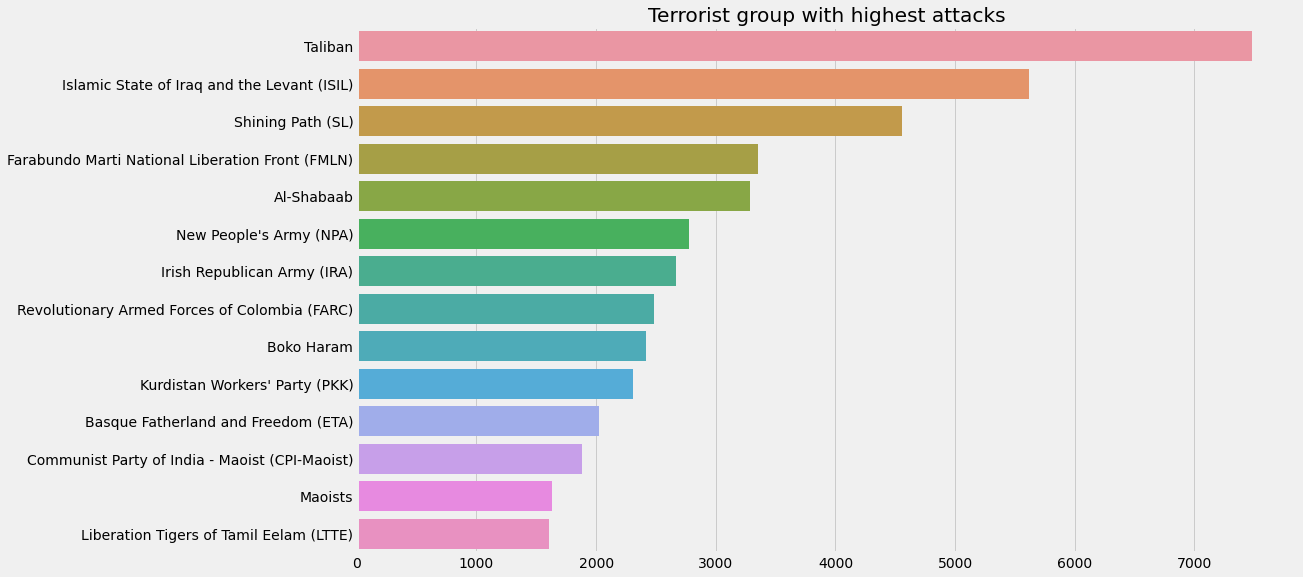

In [30]:
# Terrorist group with highest attacks
sns.barplot(df['Group'].value_counts()[1:15].values, df['Group'].value_counts()[1:15].index)
fig=plt.gcf()
fig.set_size_inches((15,9))
plt.title("Terrorist group with highest attacks")

### Top terrorist group in india and there favourite attack types


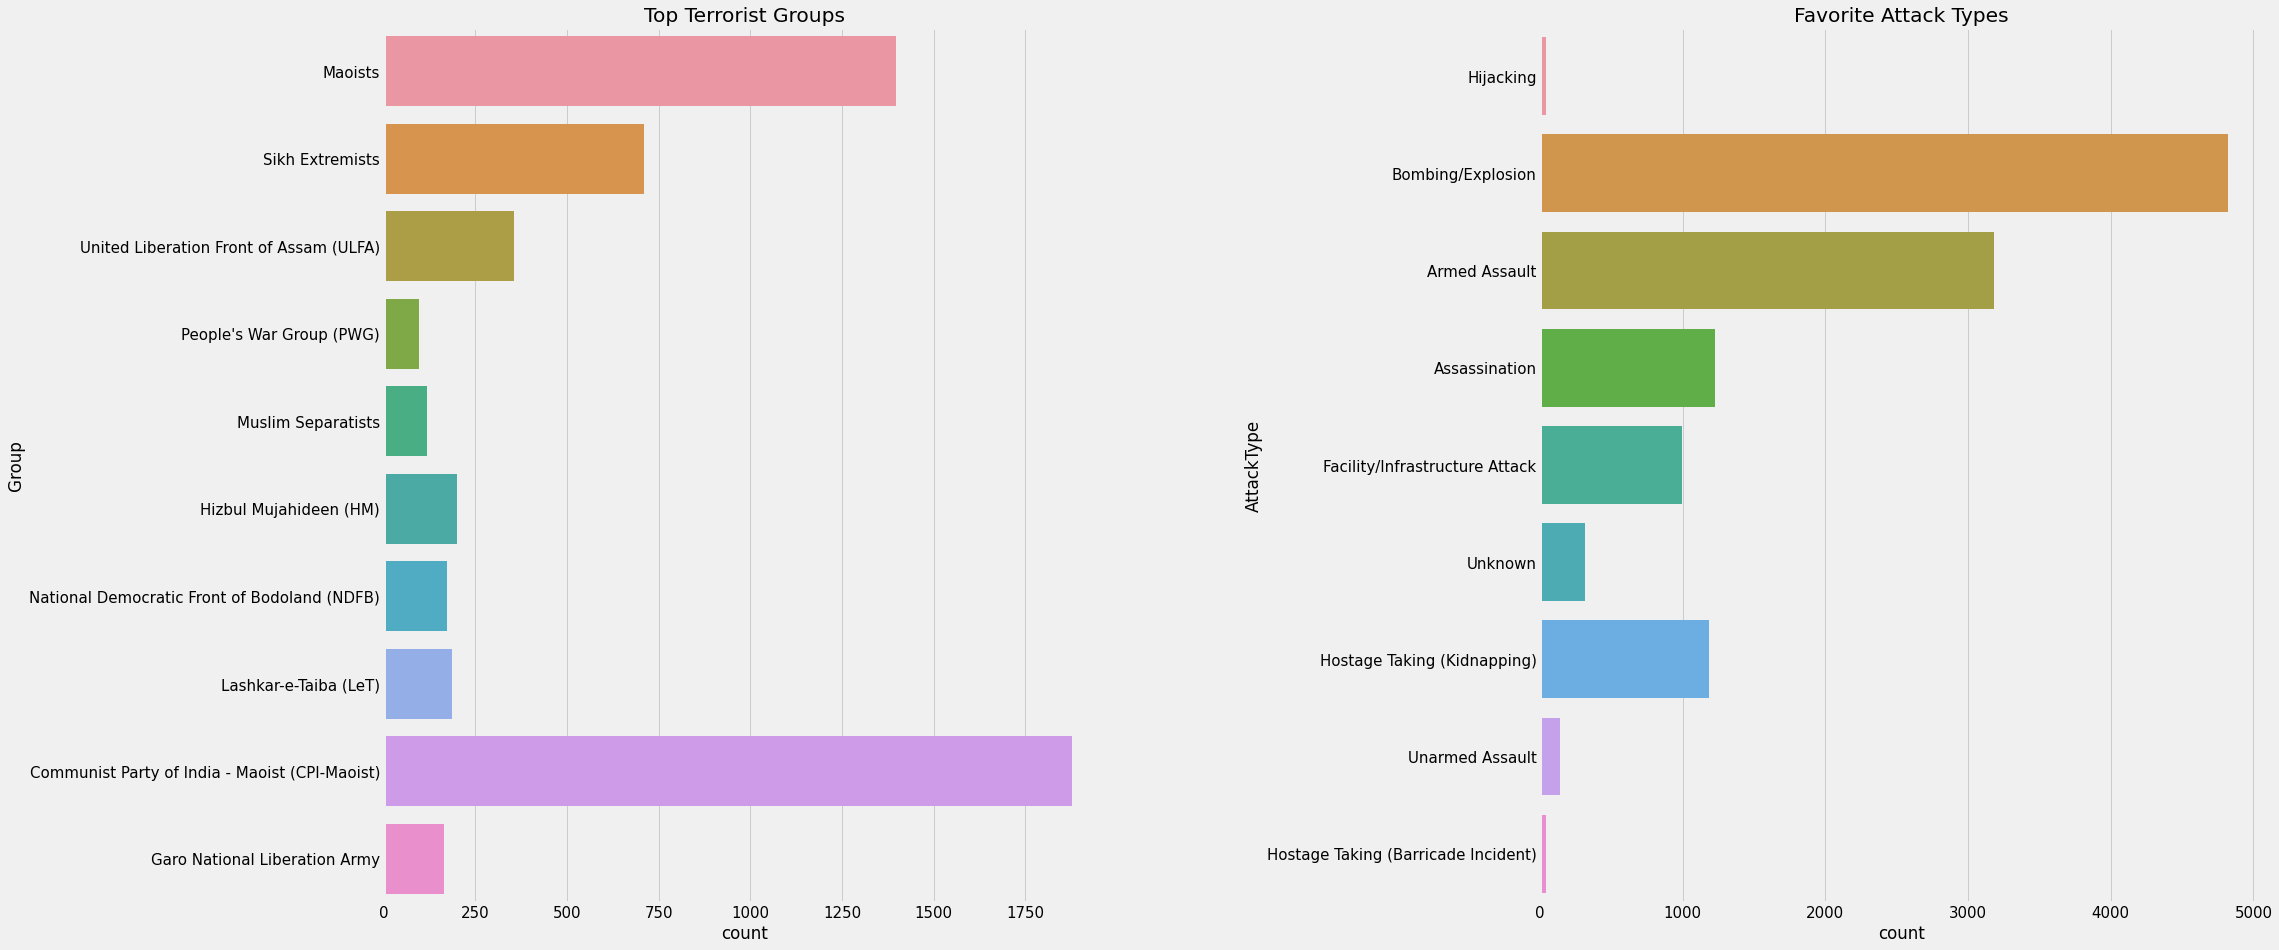

In [31]:
# Top terrorist grouo in india and there favourite attack types
terror_india = df[df['Country'] == 'India']
f,ax=plt.subplots(1,2,figsize=(30,15))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [32]:
import folium
from folium.plugins import MarkerCluster 
filterYear = df['Year'] == 1970

In [33]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'City':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

### Terrorist attacks in the year 1970 on world map


In [34]:
# Terrorist attacks in the year 1970
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map
